## Importing libraries

In [ ]:
# Importing essential libraries for data analysis, visualization, preprocessing,
# machine learning modeling, evaluation, and model explainability.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
import shap

In [ ]:

# Load the dataset
df = pd.read_csv('/content/german_credit_data.csv', index_col=0)
# Setting a random seed to ensure consistent results and loading the dataset into a DataFrame.
np.random.seed(40)

In [ ]:
# Displaying basic dataset information (e.g., column types, non-null counts) and the first 5 rows for inspection.
print("Dataset Info:")
print(df.info())
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB
None
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45  

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [ ]:
# Columns with missing values: Saving accounts (183 missing), Checking account (394 missing).
# Missing categorical values are not being imputed with random values or mode due to the potential risk
# of misrepresenting individuals' financial profiles, which could introduce bias in the loan risk prediction.
# Imputing with random values or mode might skew the model's understanding of the data, especially in risk-sensitive contexts.

## EDA

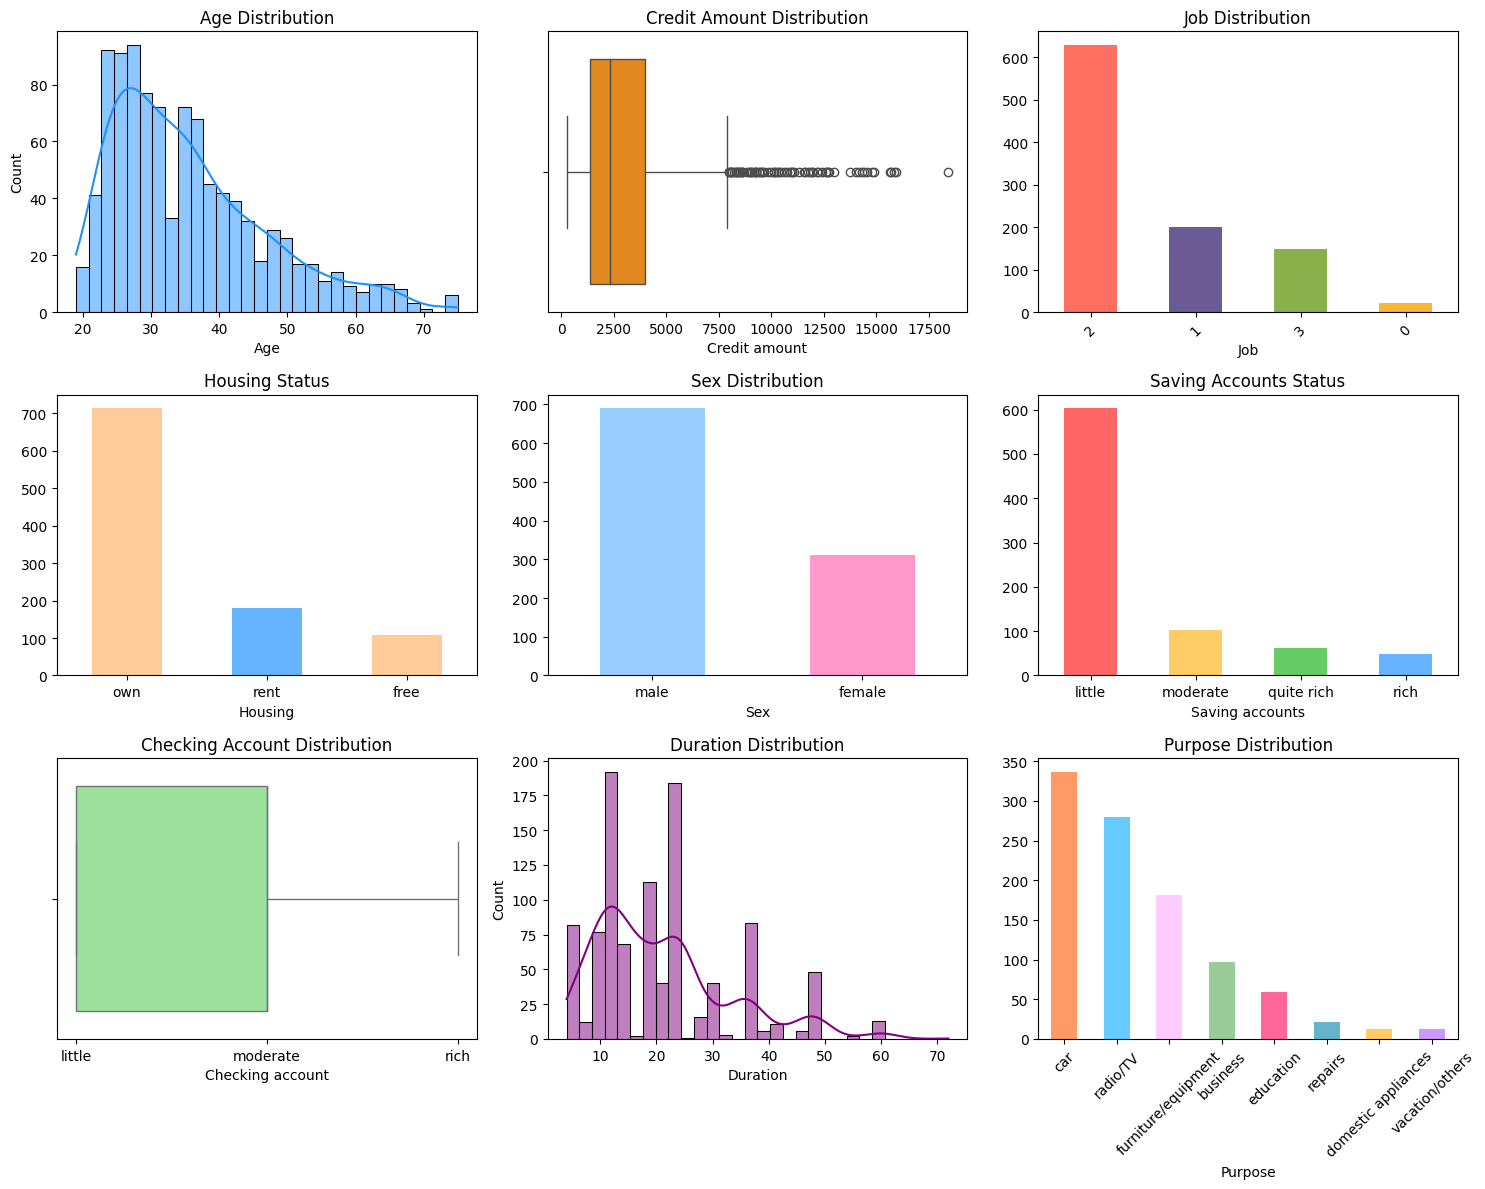

In [ ]:


# EDA - Visualizations with enhanced styling
plt.figure(figsize=(15, 12))

# 1. Age distribution with a histogram and KDE (adjusting color palette)
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='dodgerblue', line_kws={'color': 'black'})
plt.title('Age Distribution')

# 2. Credit amount distribution with a boxplot (adjusting color palette)
plt.subplot(3, 3, 2)
sns.boxplot(x=df['Credit amount'], color='darkorange')
plt.title('Credit Amount Distribution')

# 3. Job Distribution (bar plot with customized colors)
plt.subplot(3, 3, 3)
df['Job'].value_counts().plot(kind='bar', color=['#ff6f61', '#6b5b95', '#88b04b', '#f7b731'])
plt.title('Job Distribution')
plt.xticks(rotation=45)

# 4. Housing status (Bar plot instead of pie chart for better comparison)
plt.subplot(3, 3, 4)
df['Housing'].value_counts().plot(kind='bar', color=['#ffcc99', '#66b3ff'])
plt.title('Housing Status')
plt.xticks(rotation=0)

# 5. Sex distribution (Bar plot for categorical variable)
plt.subplot(3, 3, 5)
df['Sex'].value_counts().plot(kind='bar', color=['#99ccff', '#ff99cc'])
plt.title('Sex Distribution')
plt.xticks(rotation=0)

# 6. Saving accounts status (Bar plot for categorical variable)
plt.subplot(3, 3, 6)
df['Saving accounts'].value_counts().plot(kind='bar', color=['#ff6666', '#ffcc66', '#66cc66', '#66b3ff'])
plt.title('Saving Accounts Status')
plt.xticks(rotation=0)

# 7. Checking account distribution (Boxplot for numeric variable)
plt.subplot(3, 3, 7)
sns.boxplot(x=df['Checking account'], color='lightgreen')
plt.title('Checking Account Distribution')

# 8. Duration distribution (Histogram with KDE for better visualization of duration)
plt.subplot(3, 3, 8)
sns.histplot(df['Duration'], bins=30, kde=True, color='purple', line_kws={'color': 'black'})
plt.title('Duration Distribution')

# 9. Purpose distribution (Bar plot for categorical variable)
plt.subplot(3, 3, 9)
df['Purpose'].value_counts().plot(kind='bar', color=['#ff9966', '#66ccff', '#ffccff', '#99cc99', '#ff6699', '#66b3cc', '#ffcc66', '#cc99ff'])
plt.title('Purpose Distribution')
plt.xticks(rotation=45)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## Encoding

In [ ]:
#Initialize LabelEncoder for categorical columns
le_dict = {
    "Sex": LabelEncoder(),
    "Job": LabelEncoder(),
    "Housing": LabelEncoder(),
    "Saving accounts": LabelEncoder(),
    "Checking account": LabelEncoder(),
    "Purpose": LabelEncoder()
}

In [ ]:

# Encode categorical columns using LabelEncoder to convert them into numeric values.

for col, le in le_dict.items():
    df[col] = le.fit_transform(df[col])

In [ ]:
# Print mapping of labels for each column
for col, le in le_dict.items():
    print(f"\nLabel mapping for {col}:")
    for class_, label in zip(le.classes_, le.transform(le.classes_)):
        print(f"{class_} -> {label}")


Label mapping for Sex:
female -> 0
male -> 1

Label mapping for Job:
0 -> 0
1 -> 1
2 -> 2
3 -> 3

Label mapping for Housing:
free -> 0
own -> 1
rent -> 2

Label mapping for Saving accounts:
little -> 0
moderate -> 1
quite rich -> 2
rich -> 3
nan -> 4

Label mapping for Checking account:
little -> 0
moderate -> 1
rich -> 2
nan -> 3

Label mapping for Purpose:
business -> 0
car -> 1
domestic appliances -> 2
education -> 3
furniture/equipment -> 4
radio/TV -> 5
repairs -> 6
vacation/others -> 7


In [ ]:
print(df.head())

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                4                 0           1169   
1   22    0    2        1                0                 1           5951   
2   49    1    1        1                0                 3           2096   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   

   Duration  Purpose  
0         6        5  
1        48        5  
2        12        3  
3        42        4  
4        24        1  


In [ ]:
# Grouping the dataframe by 'Job' column
# and calculating the median of 'Credit amount' for each Job group.
# The transform('median') ensures that the result is aligned with the original DataFrame index,
# so each row gets the median Credit amount of its respective Job group.
df["Job_credit_median"] = df.groupby("Job")["Credit amount"].transform("median")

## Target column  :

To determine whether a customer is a credit risk (`CreditRisk = 1`) or not (`CreditRisk = 0`), a rule-based scoring system is implemented using several financial and demographic features. Each row (i.e., customer) is evaluated individually through a custom function, and a `risk_score` is calculated by considering the following parameters:

1. **Credit Amount vs. Job Median**:  
   The credit amount is compared to the median credit amount for the applicant’s job category.  
   - If it's significantly higher than peers → risk score increases.  
   - If it's much lower than peers → risk score decreases (indicates conservative borrowing).

2. **Saving Accounts**:  
   - If savings are little or missing → risk score increases.  
   - If savings are good (quite rich or rich) → risk score decreases.  
   - Moderate savings → neutral.

3. **Checking Account Balance**:  
   - Low balance → considered risky.  
   - High balance → considered safe.  
   - Missing data is treated as high risk.

4. **Duration of Loan**:  
   - Long-term loans (>48 months) are treated as higher risk.  
   - Short-term loans (<12 months) are seen as lower risk.

5. **Housing Status**:  
   - Renting implies a financial obligation → adds to risk.  
   - Owning a home reflects asset ownership → reduces risk.  
   - Free housing is considered neutral.

6. **Job Category**:  
   - Unskilled job roles are considered higher risk.  
   - Highly skilled professionals are considered safer.  
   - Skilled category is treated as neutral.

Each condition increments or decrements a customer’s `risk_score`. After scoring:
- If `risk_score > 1`, the customer is marked as **risky** (`CreditRisk = 1`).


In [ ]:
import pandas as pd
import numpy as np


def assign_risk_flags(row):
    risk_flags = 0

    # 1. Credit amount vs job-based median
    if row["Credit amount"] > row["Job_credit_median"]:
        risk_flags += 1
    elif row["Credit amount"] < 0.5 * row["Job_credit_median"]:
        risk_flags -= 1

    # 2. Saving accounts (0 little, 1 moderate, 2 quite rich, 3 rich, 4 nan)
    if row["Saving accounts"] in [0, 4]:      # little OR nan (no savings)
        risk_flags += 1
    elif row["Saving accounts"] in [2, 3]:    # quite rich/rich
        risk_flags -= 1
    # moderate (1) → neutral

    # 3. Checking account (0 little, 1 moderate, 2 rich, 3 nan)
    if row["Checking account"] == 0:          # little
        risk_flags += 1
    elif row["Checking account"] == 2:        # rich
        risk_flags -= 1
    # moderate (1) → neutral, nan (3) → treat as +1
    if row["Checking account"] == 3:
        risk_flags += 1

    # 4. Duration (in months)
    if row["Duration"] > 48:
        risk_flags += 1
    elif row["Duration"] < 12:
        risk_flags -= 1




    # others → neutral

    # 7. Housing (0 free,1 own,2 rent)
    if row["Housing"] == 2:                   # rent
        risk_flags += 1
    elif row["Housing"] == 1:                 # own
        risk_flags -= 1
    # free (0) → neutral

    # 8. Job (0 unskilled non-res,1 unskilled res,2 skilled,3 highly skilled)
    if row["Job"] in [0, 1]:                  # unskilled
        risk_flags += 1
    elif row["Job"] == 3:                     # highly skilled
        risk_flags -= 1
    # skilled (2) → neutral

    return risk_flags

# Apply function to get risk score
df["risk_score"] = df.apply(assign_risk_flags, axis=1)

# Update threshold: only score > 2 will be considered risky
df["CreditRisk"] = np.where(df["risk_score"] > 1, 1, 0)

# Optional: Count risky vs not risky applicants
print(df["CreditRisk"].value_counts())



CreditRisk
0    603
1    397
Name: count, dtype: int64


In [ ]:
# Define features and target
X = df.drop(columns=["CreditRisk","risk_score","Job_credit_median"])
y = df['CreditRisk']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)



In [ ]:
# Build separate pipelines for Random Forest, Gradient Boosting, and Logistic Regression.
# Each pipeline includes feature selection using SelectKBest and its respective classifier.
# Define a combined parameter grid to search best hyperparameters for all models.
# Use GridSearchCV to find the best model based on ROC AUC score with cross-validation

In [ ]:

pipeline_rf = Pipeline(steps=[

    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier(random_state=40))
])

pipeline_gb = Pipeline(steps=[

    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', GradientBoostingClassifier(random_state=40))
])

pipeline_lr = Pipeline(steps=[

    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=40))
])

# Define parameter grids for each classifier
param_grid = [
    {
        'feature_selection__k': [10, 15],
        'classifier': [RandomForestClassifier(random_state=40)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__max_features': ['sqrt']
    },
    {
        'feature_selection__k': [10, 15],
        'classifier': [GradientBoostingClassifier(random_state=40)],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5]
    },
    {
        'feature_selection__k': [10, 15],
        'classifier': [LogisticRegression(max_iter=1000, random_state=40, solver='liblinear')],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    }
]



# Perform grid search using the common base pipeline (any of the above)
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("\nBest parameters found:")
print(grid_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(



Best parameters found:
{'classifier': GradientBoostingClassifier(random_state=40), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'feature_selection__k': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       181
           1       0.97      0.93      0.95       119

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Confusion Matrix:
[[177   4]
 [  8 111]]

ROC AUC Score: 0.9894145503505268


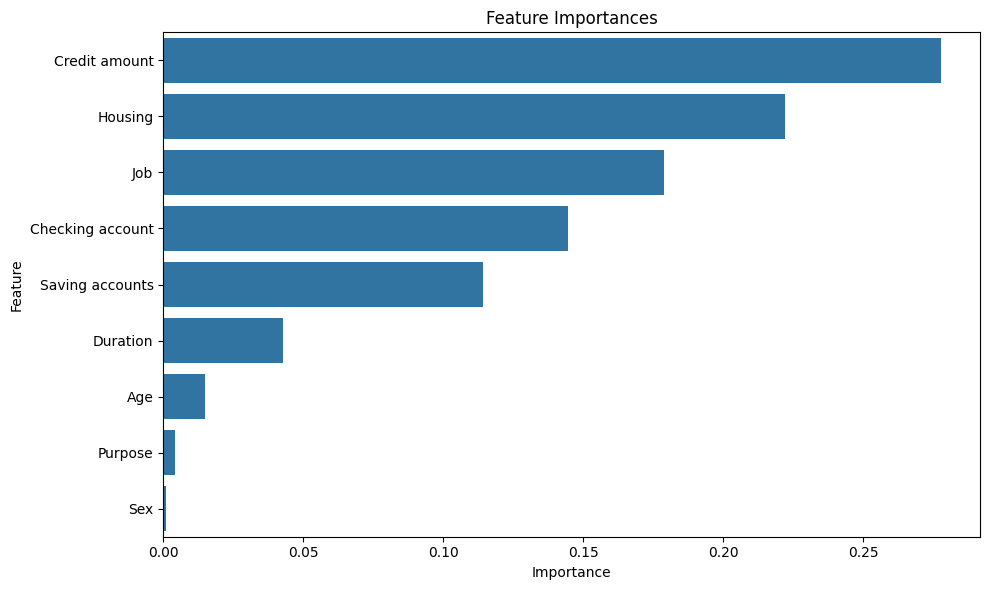

In [ ]:
# --- Feature Importance (after grid_search & evaluation) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Grab the original feature names from the DataFrame you passed into .fit()

feature_names = X_train.columns.tolist()

# 2) Pull out the SelectKBest step and the classifier
sel = best_model.named_steps['feature_selection']
clf = best_model.named_steps['classifier']

# 3) Boolean mask of selected features
mask = sel.get_support()

# 4) Sanity check
if len(mask) != len(feature_names):
    raise ValueError(
        f"Mask length ({len(mask)}) != number of features ({len(feature_names)})!"
    )

# 5) Build list of selected feature names
selected_features = [name for name, keep in zip(feature_names, mask) if keep]

# 6) Extract importances (or coefficients) and zip with feature names
if hasattr(clf, 'feature_importances_'):
    importances = clf.feature_importances_
    data = list(zip(selected_features, importances))
    df_imp = pd.DataFrame(data, columns=['Feature', 'Importance']) \
                .sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df_imp)
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

elif hasattr(clf, 'coef_'):
    coefs = clf.coef_.ravel()
    data = list(zip(selected_features, coefs))
    df_imp = pd.DataFrame(data, columns=['Feature', 'Coefficient']) \
                .sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=df_imp)
    plt.title('Feature Coefficients')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Best estimator has neither .feature_importances_ nor .coef_.")


In [ ]:

mask = best_model.named_steps['feature_selection'].get_support()
selected_feature_names = [
    name for name, keep in zip(X_train.columns.tolist(), mask) if keep
]


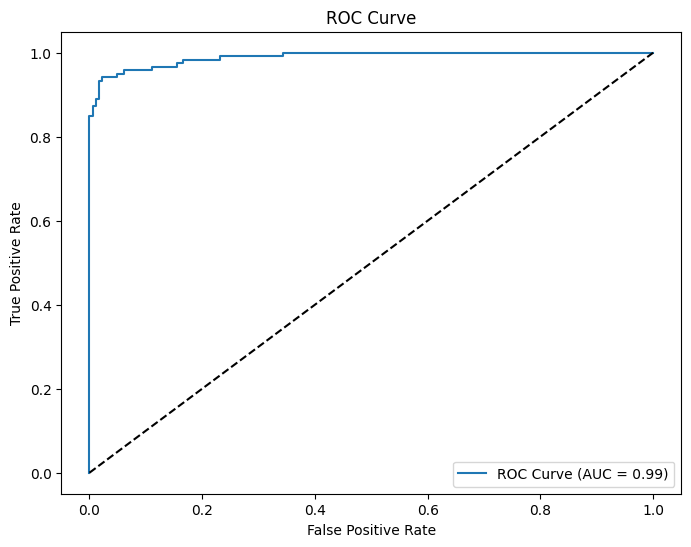

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import roc_curve, roc_auc_score

#   ROC Curve (same as before)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score   = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import joblib
# 1) Top 5 features by importance

top5 = df_imp.head(5)

print("\nKey Insights & Recommendations:")
print("1. The most important features for credit risk prediction are:")
for _, row in top5.iterrows():
    print(f"   - {row['Feature']} (importance: {row['MeanAbsSHAP'] if 'MeanAbsSHAP' in row else row.get('Importance', row.get('Coefficient')):.3f})")

# 2) Model performance
auc = roc_auc_score(y_test, y_proba)
print(f"\n2. The model achieved a ROC AUC score of {auc:.2f}, indicating strong predictive power.")

# 3) Business recommendations
print("\n3. Recommendations for the credit evaluation process:")
print("   - Flag applicants with high credit amounts and long durations for deeper review.")
print("   - Automate preliminary risk‐scoring using these top features to streamline decisions.")
print("   - Retrain and validate the model periodically (e.g. quarterly) to capture changing borrower behavior.")
print("   - Leverage predicted probabilities to tailor interest rates or collateral requirements by risk level.\n")

# 4) Save final pipeline/model
joblib.dump(best_model, 'credit_risk_pipeline.pkl')
print("✅ Saved the trained pipeline to credit_risk_pipeline.pkl")


Key Insights & Recommendations:
1. The most important features for credit risk prediction are:
   - Credit amount (importance: 0.278)
   - Housing (importance: 0.222)
   - Job (importance: 0.179)
   - Checking account (importance: 0.144)
   - Saving accounts (importance: 0.114)

2. The model achieved a ROC AUC score of 0.99, indicating strong predictive power.

3. Recommendations for the credit evaluation process:
   - Flag applicants with high credit amounts and long durations for deeper review.
   - Automate preliminary risk‐scoring using these top features to streamline decisions.
   - Retrain and validate the model periodically (e.g. quarterly) to capture changing borrower behavior.
   - Leverage predicted probabilities to tailor interest rates or collateral requirements by risk level.

✅ Saved the trained pipeline to credit_risk_pipeline.pkl


### Load the saved model, make predictions on test data, and evaluate model performance using classification report and confusion matrix


In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the saved model
loaded_model = joblib.load('credit_risk_pipeline.pkl')

# Step 2: Predict using test data
y_pred_loaded = loaded_model.predict(X_test)
y_proba_loaded = loaded_model.predict_proba(X_test)[:, 1]

# Step 3: Evaluation
print("\n📊 Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded))

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_loaded))




📊 Classification Report (Loaded Model):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       181
           1       0.97      0.93      0.95       119

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

🔍 Confusion Matrix:
[[177   4]
 [  8 111]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
categorical_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    encoders[col] = le


In [ ]:
import joblib
joblib.dump(encoders, 'encoders.pkl')


['encoders.pkl']

## For manual checking and verification

In [ ]:
# New applicant details
new_applicant = {
    "Age": 32,
    "Sex": "female",
    "Job": 1,
    "Housing": "own",
    "Saving accounts": "little",
    "Checking account": "little",
    "Credit amount": 2000,
    "Duration": 37,
    "Purpose": "car"
}

# Add Job_credit_median from training data
job_credit_medians = df.groupby("Job")["Credit amount"].median().to_dict()
new_applicant["Job_credit_median"] = job_credit_medians[new_applicant["Job"]]

# Convert to DataFrame
new_df = pd.DataFrame([new_applicant])

# Encode categorical values
for col, le in le_dict.items():
    new_df[col] = le.transform(new_df[col].astype(str))

# Select same features
new_df = new_df[selected_feature_names]

# ML Prediction
model_prediction = best_model.predict(new_df)[0]
model_label = {0: "Not Risky", 1: "Risky"}[model_prediction]

# Rule-based prediction
manual_score = assign_risk_flags(new_applicant)
manual_label = "Risky" if manual_score > 1 else "Not Risky"

# Compare
print(f"ML Model Prediction   : {model_label}")
print(f"Rule-based Prediction : {manual_label}")
if model_label == manual_label:
    print("✅ Both match — looks good!")
else:
    print("⚠️ Mismatch — investigate further.")


ML Model Prediction   : Risky
Rule-based Prediction : Risky
✅ Both match — looks good!


In [ ]:
print
